In [4]:
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

%matplotlib inline

In [11]:
load_dir = "../results/lightgbm/"

bins = np.load(load_dir + "bins.npy")[0,:-1]

distr_joint, distr_c, distr_s = {}, {}, {}

for key in ["train", "val", "test"]:
    distr_joint[key] = np.load(load_dir + "P(s,c)-{}.npy".format(key))
    distr_c[key] = np.load(load_dir + "P(c)-{}.npy".format(key))    
    distr_s[key] = np.load(load_dir + "P(s)-{}.npy".format(key))    

/home/vale/.local/lib/python3.5/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/home/vale/.local/lib/python3.5/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


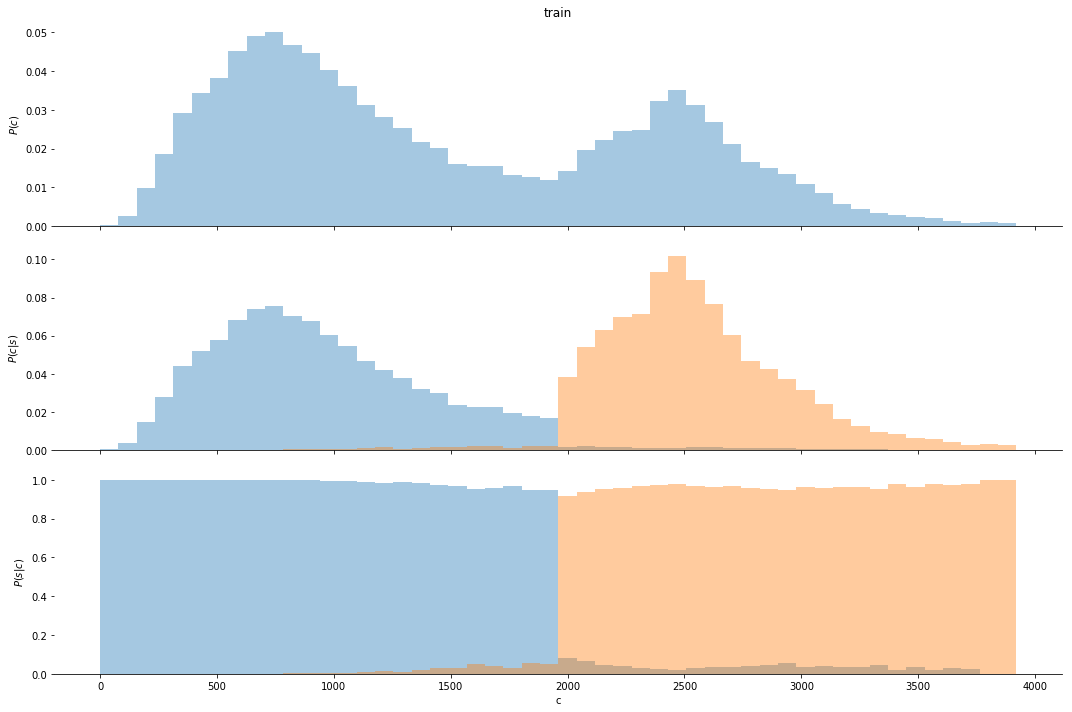

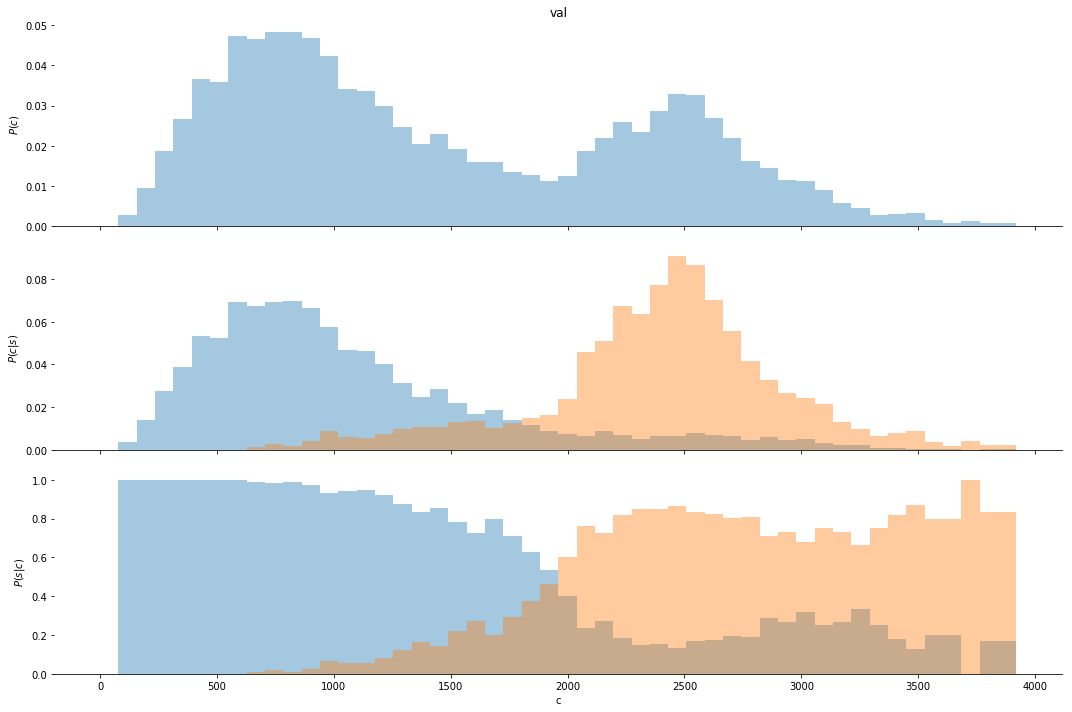

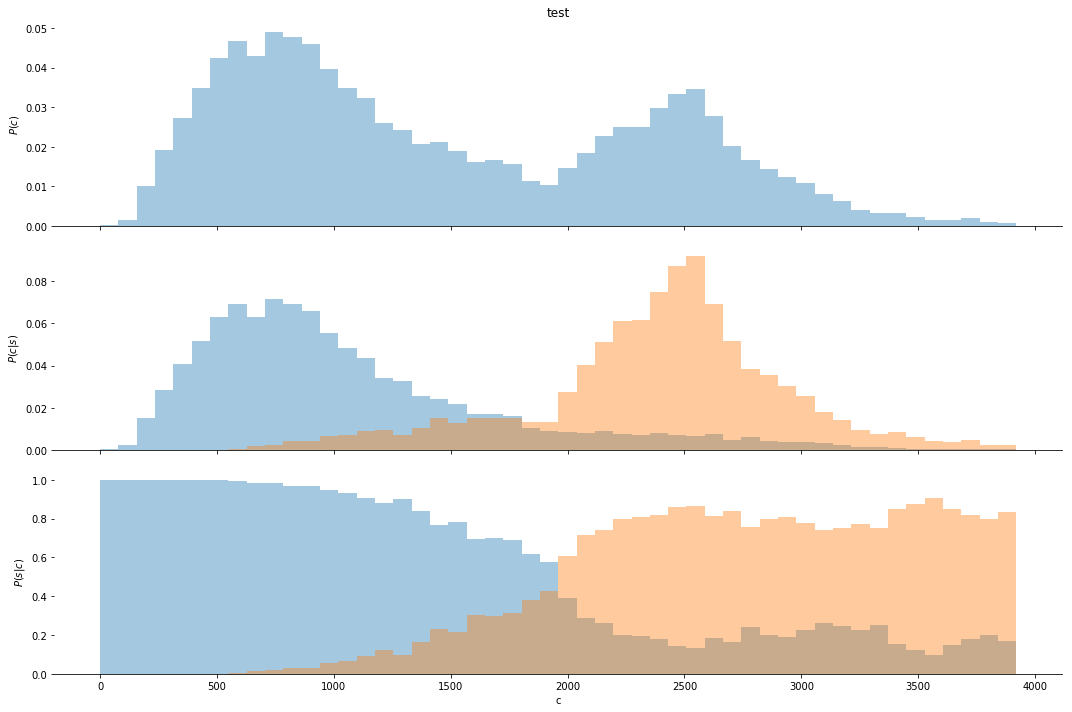

In [17]:
B = len(bins)

for key in ["train", "val", "test"]:
    f, axes = plt.subplots(3, 1, figsize=(15, 10), sharex=True)
    sns.despine(left=True)

    sns.distplot(bins, hist_kws={"weights": distr_c[key][0]}, kde=False, bins=B, ax=axes[0])
    axes[0].set(ylabel="$P(c)$")
    
    c_given_s = distr_joint[key][0]/distr_s[key][0][:, None]
    sns.distplot(bins, hist_kws={"weights": c_given_s[0]}, kde=False, bins=B, ax=axes[1])
    sns.distplot(bins, hist_kws={"weights": c_given_s[1]}, kde=False, bins=B, ax=axes[1])
    axes[1].set(ylabel="$P(c | s)$")
    
    sns.distplot(bins, hist_kws={"weights": distr_joint[key][0][0]/distr_c[key][0]}, kde=False, bins=B, ax=axes[2])
    sns.distplot(bins, hist_kws={"weights": distr_joint[key][0][1]/distr_c[key][0]}, kde=False, bins=B, ax=axes[2])
    axes[2].set(ylabel="$P(s | c)$")
    
    axes[0].set_title(key)
    axes[-1].set(xlabel="c")
    plt.tight_layout()
    
    plt.savefig("{}.png".format(key), bbox_inches="tight")